In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("All libraries imported")
%matplotlib inline
sns.set(style="whitegrid")

All libraries imported


In [23]:
file_path=r'C:\Users\NISHA\Desktop\yashikaclg\literacy_data.csv.csv'
literacy_df = pd.read_csv(file_path, skiprows=4)
print(literacy_df.head())
print(literacy_df.columns)

  Country Name Country Code  \
0        Aruba          ABW   
1        Aruba          ABW   
2        Aruba          ABW   
3        Aruba          ABW   
4        Aruba          ABW   

                                      Indicator Name     Indicator Code  \
0      Population ages 15-64 (% of total population)  SP.POP.1564.TO.ZS   
1       Population ages 0-14 (% of total population)  SP.POP.0014.TO.ZS   
2  Unemployment, total (% of total labor force) (...     SL.UEM.TOTL.ZS   
3  Unemployment, male (% of male labor force) (mo...  SL.UEM.TOTL.MA.ZS   
4  Unemployment, female (% of female labor force)...  SL.UEM.TOTL.FE.ZS   

        1960       1961       1962       1963       1964       1965  ...  \
0  54.632024  54.953804  55.230824  55.618712  56.131658  56.703901  ...   
1  42.512108  42.175482  41.867010  41.432243  40.846769  40.177006  ...   
2        NaN        NaN        NaN        NaN        NaN        NaN  ...   
3        NaN        NaN        NaN        NaN        NaN  

In [31]:

literacy_df = literacy_df.loc[:, ~literacy_df.columns.str.contains('^Unnamed')]

literacy_df = literacy_df[literacy_df['Indicator Name'].str.contains('literacy', case=False, na=False)]

south_asian_countries = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']
literacy_df = literacy_df[literacy_df['Country Name'].isin(south_asian_countries)]

year_cols = [col for col in literacy_df.columns if col.isdigit() and int(col) >= 2000]

literacy_long = literacy_df.melt(
    id_vars=["Country Name", "Indicator Name"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Literacy Rate"
)

literacy_long = literacy_long.dropna(subset=["Literacy Rate"])
literacy_long["Year"] = literacy_long["Year"].astype(int)
literacy_long["Literacy Rate"] = literacy_long["Literacy Rate"].round(2)
literacy_long.rename(columns={
    "Country Name": "Country",
    "Indicator Name": "Indicator"
}, inplace=True)

literacy_long.head()



,Country,Indicator,Year,Literacy Rate
10,Bangladesh,"Literacy rate, youth total (% of people ages 1...",2000,100.0
11,Bangladesh,"Literacy rate, youth male (% of males ages 15-24)",2000,100.0
12,Bangladesh,"Literacy rate, youth (ages 15-24), gender pari...",2000,1.0
13,Bangladesh,"Literacy rate, youth female (% of females ages...",2000,100.0
35,Maldives,"Literacy rate, adult total (% of people ages 1...",2000,96.0


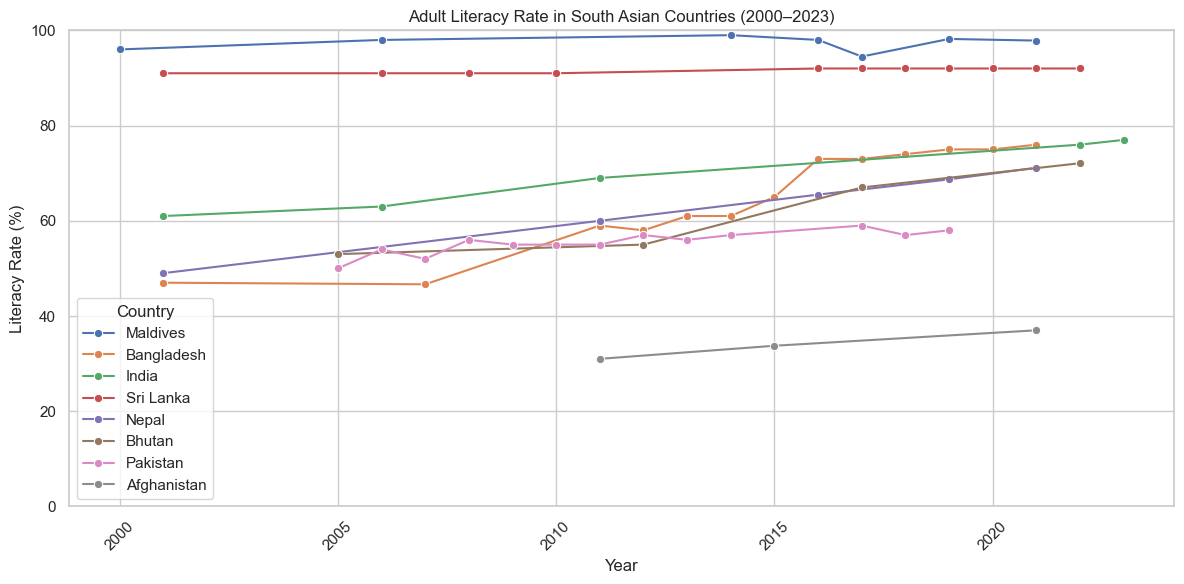

In [32]:
adult_lit = literacy_long[literacy_long["Indicator"].str.contains("adult total", case=False)]
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=adult_lit,
    x="Year",
    y="Literacy Rate",
    hue="Country",
    marker="o"
)

plt.title("Adult Literacy Rate in South Asian Countries (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Literacy Rate (%)")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.grid(True)
plt.show()


C:\Users\NISHA\AppData\Local\Temp\ipykernel_7624\2653058603.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=latest_adult_lit, x="Country", y="Literacy Rate", palette="Set2")


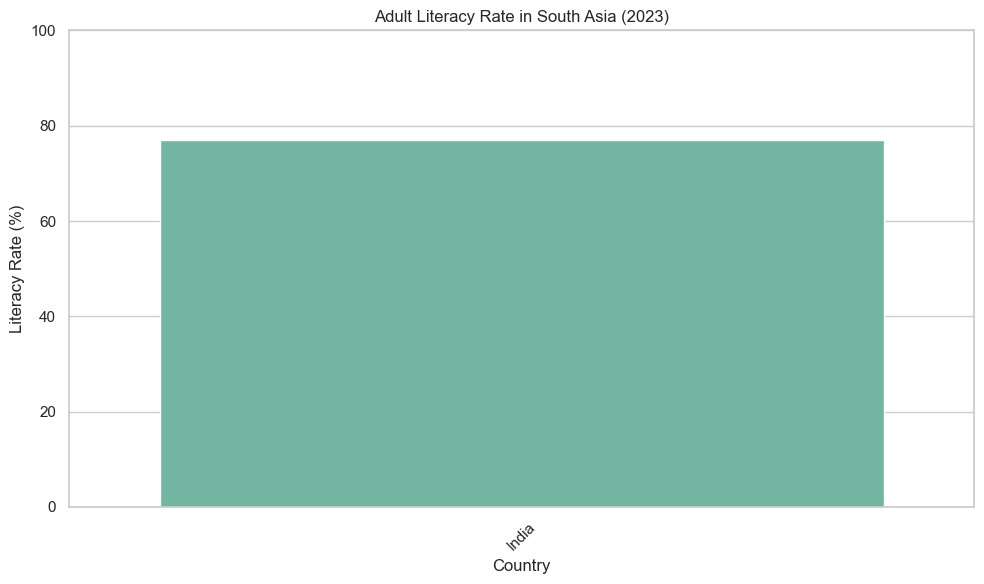

In [33]:
#Plotting bar graph of recent year
latest_year = literacy_long["Year"].max()

latest_adult_lit = literacy_long[
    (literacy_long["Indicator"].str.contains("adult total", case=False)) &
    (literacy_long["Year"] == latest_year)
]

plt.figure(figsize=(10, 6))
sns.barplot(data=latest_adult_lit, x="Country", y="Literacy Rate", palette="Set2")
plt.title(f"Adult Literacy Rate in South Asia ({latest_year})")
plt.ylabel("Literacy Rate (%)")
plt.xlabel("Country")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


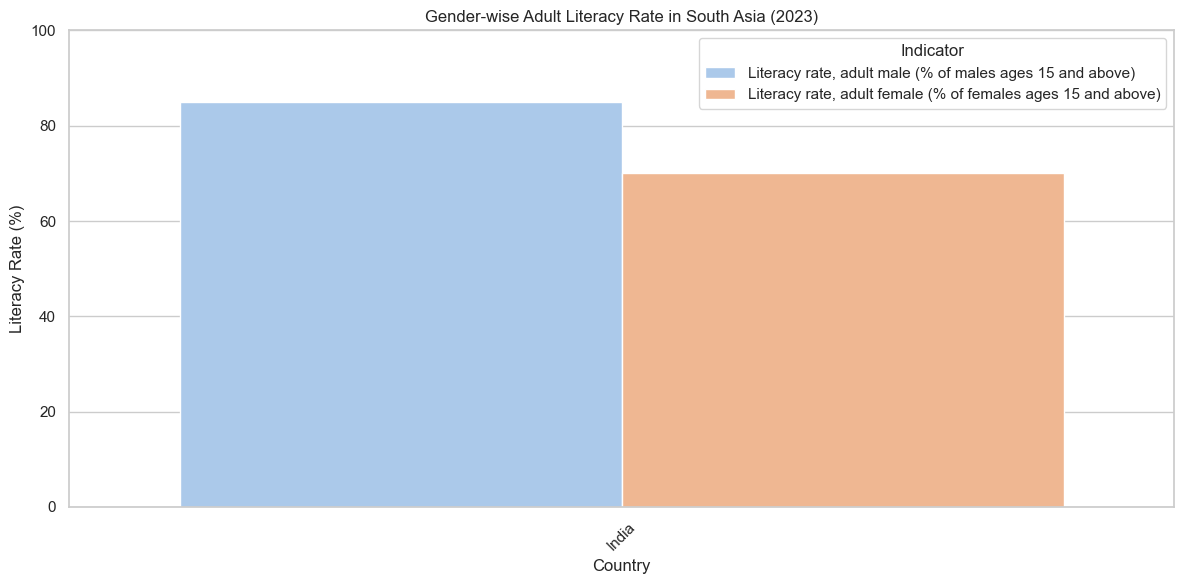

In [34]:
latest_gender_lit = literacy_long[
    (literacy_long["Indicator"].str.contains("adult female|adult male", case=False)) &
    (literacy_long["Year"] == latest_year)
]

plt.figure(figsize=(12, 6))
sns.barplot(data=latest_gender_lit, x="Country", y="Literacy Rate", hue="Indicator", palette="pastel")
plt.title(f"Gender-wise Adult Literacy Rate in South Asia ({latest_year})")
plt.ylabel("Literacy Rate (%)")
plt.xlabel("Country")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


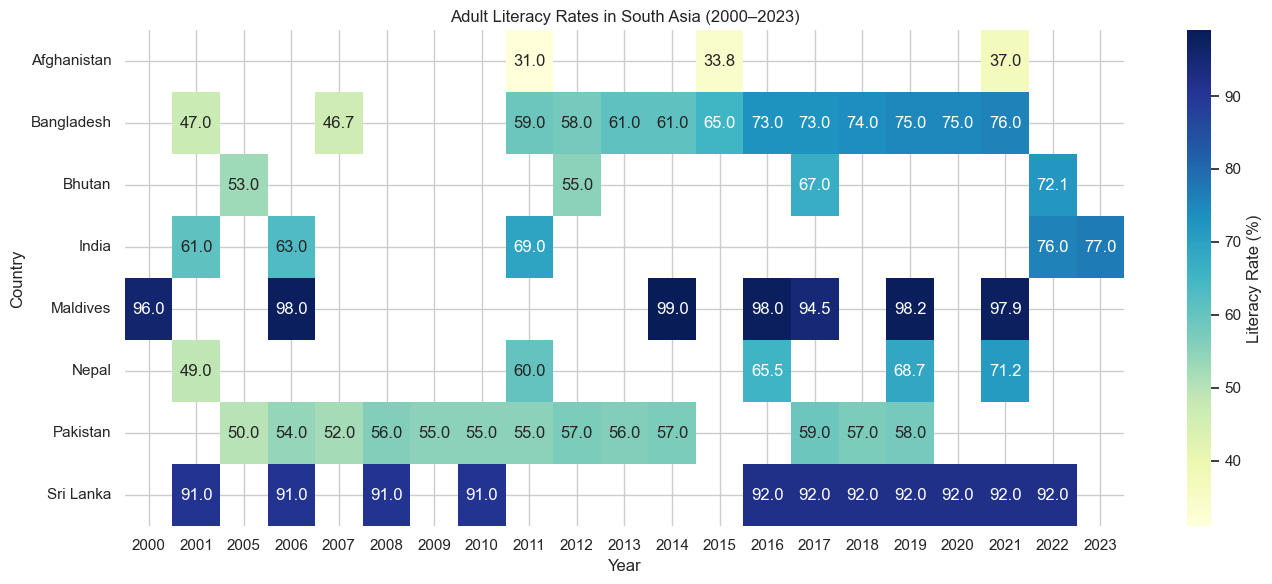

In [35]:
heatmap_data = literacy_long[
    literacy_long["Indicator"].str.contains("adult total", case=False)
].pivot(index="Country", columns="Year", values="Literacy Rate")

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Literacy Rate (%)'})
plt.title("Adult Literacy Rates in South Asia (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


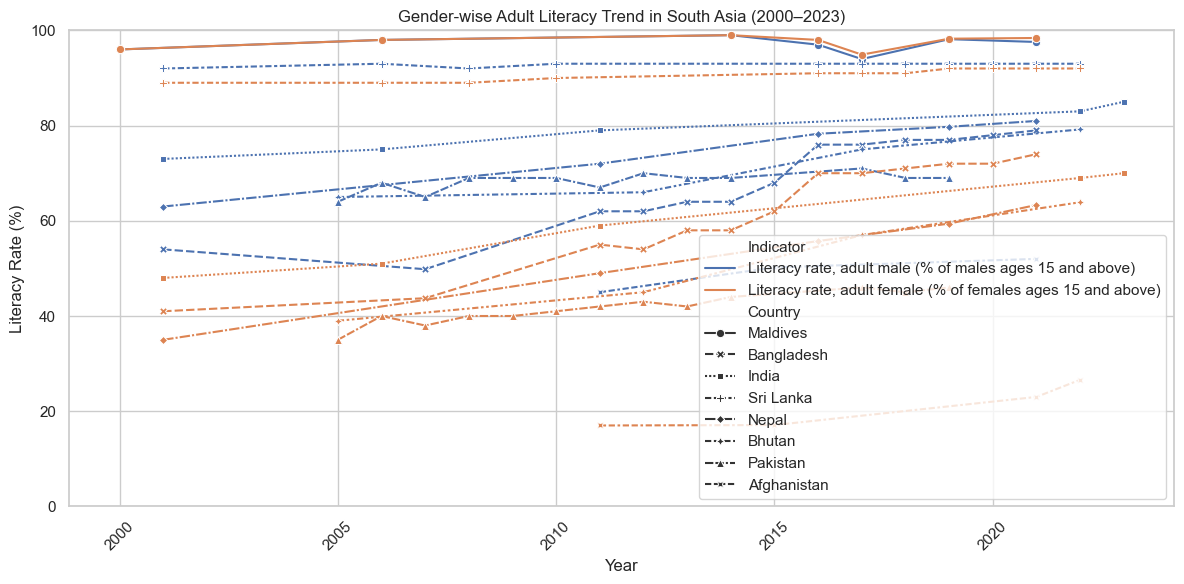

In [36]:
gender_lit = literacy_long[
    literacy_long["Indicator"].str.contains("adult female|adult male", case=False)
]

plt.figure(figsize=(12, 6))
sns.lineplot(data=gender_lit, x="Year", y="Literacy Rate", hue="Indicator", style="Country", markers=True)
plt.title("Gender-wise Adult Literacy Trend in South Asia (2000–2023)")
plt.ylabel("Literacy Rate (%)")
plt.xlabel("Year")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
literacy_long.to_csv("south_asia_literacy_tableau.csv", index=False)